In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [12]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [13]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print('train_df shape :',train_df.shape)
print('test_df shape :',test_df.shape)

train_df shape : (42000, 785)
test_df shape : (28000, 784)


In [16]:
#checking for null values for train
train_df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [17]:
#checking for null values for test
test_df.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [18]:
#checking for duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [19]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


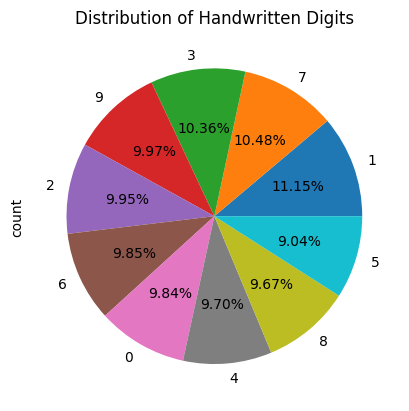

In [20]:
train_df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

<ipython-input-21-af7969721a9d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df, x='label', palette='viridis')


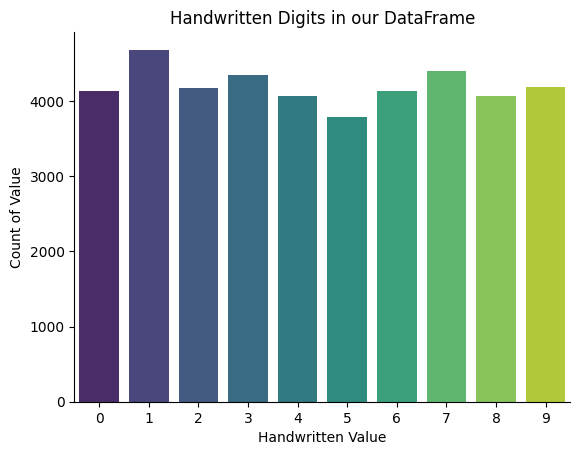

In [21]:

# Create a DataFrame for the labels
labels_df = pd.DataFrame(train_df, columns=['label'])

# Plot the distribution of digits
sns.countplot(data=labels_df, x='label', palette='viridis')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()

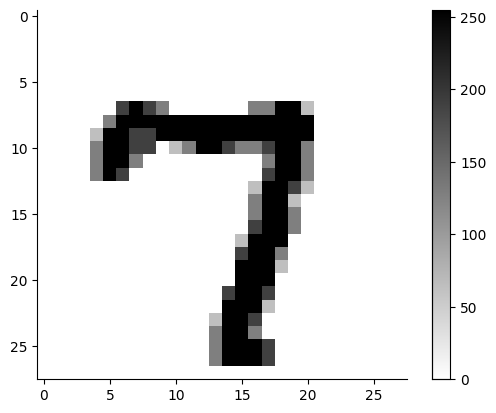

In [22]:
digit = train_df.iloc[29, 1:]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

In [23]:
#splitting data into X and y
X = train_df.iloc[:,1:]
y = train_df['label']

In [25]:
#converting to numpy arrays
X = X.values
y = y.values

In [26]:
#normalizing the data
X = X/255.0
test_df = test_df/255.0

In [27]:
X = X.reshape(-1, 28, 28, 1)

In [30]:
#one hot encoding y
from keras.utils import to_categorical
y = y.ravel()
y = to_categorical(y, 10)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
#creating a CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,994 (257.79 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.7996 - loss: 1.4758 - val_accuracy: 0.1082 - val_loss: 2.6224
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9675 - loss: 0.3614 - val_accuracy: 0.1133 - val_loss: 2.2515
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9735 - loss: 0.2162 - val_accuracy: 0.8233 - val_loss: 0.6325
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.1687 - val_accuracy: 0.9687 - val_loss: 0.1820
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.1463 - val_accuracy: 0.7375 - val_loss: 1.0576
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9780 - loss: 0.1408 - val_accuracy: 0.9752 - val_loss: 0.1466
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.1342 - val_accuracy: 0.9639 - val_loss: 0.1909
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9815 - loss: 0.1275 - val_accuracy: 

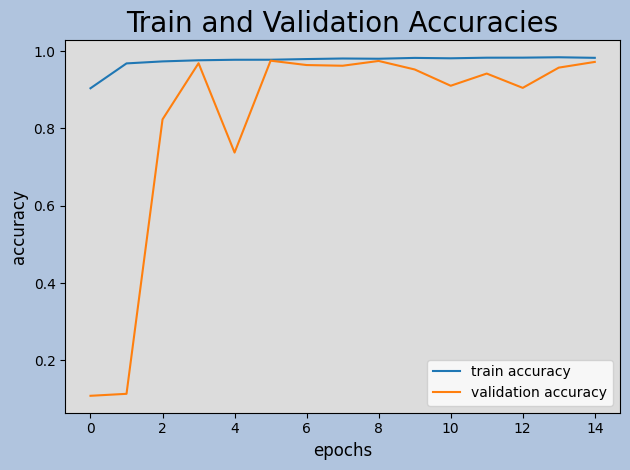

In [38]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

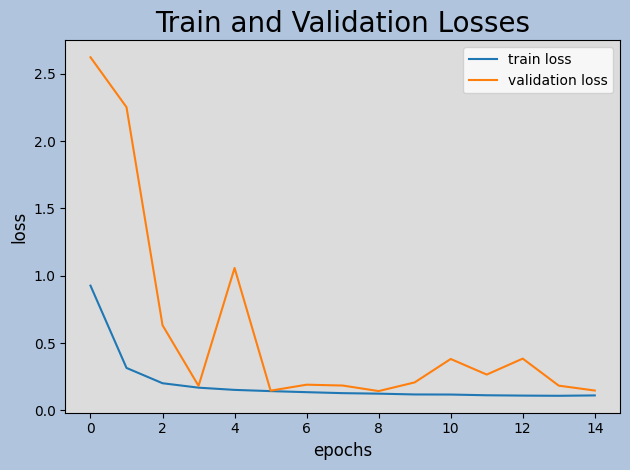

In [37]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [39]:
# Save the model
model.save("MNIST_Classification.h5")

In [40]:
# Convert Test data to NumPy array
test_X = test_df.to_numpy()

# Reshape X to 4D for CNN
test_X = test_X.reshape(-1, 28, 28, 1)  # reshaping 28x28 grayscale images

In [41]:
test_X.shape

(28000, 28, 28, 1)

In [42]:
#normalizing test data
test_X = test_X/255.0

In [45]:
from tensorflow.keras.models import load_model

model = load_model("MNIST_Classification.h5")  # Load the model you saved earlier


In [47]:
# Predict the labels for the test data
predictions = model.predict(test_X)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [48]:
predicted_labels = np.argmax(predictions, axis=1)

In [49]:
print(predicted_labels)


[1 1 1 ... 1 1 1]


In [50]:
predicted_labels.shape


(28000,)

In [51]:
submission =  pd.DataFrame({
        "ImageId": test_df.index+1,
        "Label":predicted_labels
    })

In [52]:
submission['Label'].value_counts()


,count
Label,
1,28000


In [53]:
submission.to_csv('MNIST_submission.csv', index=False)